# Webscraping in Bigbasket 

# Problem Statement

    * The objective of this project was to collect and analyze data from BigBasket to identify products
    with discounts and offers exceeding 50% .The focus was on finding and understanding products where customers could save 
    more thanhalf of the original price, which is a crucial aspect for budget-conscious consumers.

# Lets import the required packages 

In [18]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.webdriver import Keys
import time
from tabulate import tabulate
import re
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import winsound
import time
import numpy



In [31]:
# Create a Chrome web driver instance and set up its service
driver = webdriver.Chrome(service=ChromeService(ChromeDriverManager().install()))
driver = webdriver.Chrome()

entertheproduct = input("Enter the products:")

# Define the URL you want to access
url = "https://www.bigbasket.com/"

# Open the specified URL in the web browser
driver.get(url)

# Maximize the web browser window
driver.maximize_window()


search = driver.find_element(By.CSS_SELECTOR,"#siteLayout > header.sm\:hidden.z-30.flex.flex-col.col-span-12 > div.grid.grid-flow-col.gap-x-6.h-9.mt-3\.5.mb-2\.5 > div.grid.place-content-start.grid-flow-col.gap-x-6 > div > div > div > div > input")
search.send_keys(entertheproduct)
search.send_keys(Keys.ENTER)

time.sleep(10)


Enter the products:eno


In [32]:
# Adjust the frequency and duration as needed
frequency = 500  # in Hertz
duration = 1000  # in milliseconds
total_duration = 5  # 5 seconds

#----------------------------------------------------------------------------------------------------------

# Initialize empty lists to store data
overall_name = []         # List to store product names
overall_old_price = []    # List to store old prices
overall_off_price = []    # List to store offer prices
overall_quantity = []     # List to store product quantities
overall_category = []     # List to store product categories
overall_offer = []        # List to store offer details

#----------------------------------------------------------------------------------------------------------
# Define the title you're looking for
target_title = "- Thats all folks -"

# Set the scroll increment in pixels (adjust as needed)
scroll_increment = 500  # You can change this value

# Set the maximum number of scrolls before stopping (adjust as needed)
max_scrolls = 200  # You can change this value

scroll_count = 0

# Loop to scroll down and search for the title
while scroll_count < max_scrolls:
    time.sleep(2)
    # Check if the title is present on the webpage
    if target_title in driver.page_source:
        break  # If found, exit the loop

    # Scroll down by a fixed number of pixels
    driver.execute_script(f"window.scrollBy(0, {scroll_increment});")
    scroll_count += 1


soup = BeautifulSoup(driver.page_source, 'html.parser')

name = soup.find_all('h3',class_='block m-0 line-clamp-2 font-regular text-base leading-sm text-darkOnyx-800 pt-0.5 h-full')
overall_name = [x.text for x in name]

#----------------------------------------------------------------------------------------------------------

old_price = soup.find_all('div', class_='Pricing___StyledDiv-sc-pldi2d-0 bUnUzR')

old_price = [x.text for x in old_price]

overall_old_price = [x[x.find('₹', x.find('₹') + 1) + 1:] if '₹' in x and x.find('₹', x.find('₹') + 1) != -1 else '0' if x == '' else x[x.find('₹') + 1:] for x in old_price]

#----------------------------------------------------------------------------------------------------------  

off_price = soup.find_all('div', class_='Pricing___StyledDiv-sc-pldi2d-0 bUnUzR')

off_price = [x.text for x in off_price]

overall_off_price = [re.search(r'₹(\d+(\.\d+)?)', text).group(1) if re.search(r'₹(\d+(\.\d+)?)', text) else "0" for text in off_price]

#----------------------------------------------------------------------------------------------------------        

quantity = soup.find_all('span', class_=["Label-sc-15v1nk5-0 gJxZPQ truncate", "Label-sc-15v1nk5-0 PackChanger___StyledLabel-sc-newjpv-1 gJxZPQ cWbtUx"])

overall_quantity = [x.text for x in quantity]

#----------------------------------------------------------------------------------------------------------

category = soup.find_all('span',class_='Label-sc-15v1nk5-0 BrandName___StyledLabel2-sc-hssfrl-1 gJxZPQ keQNWn')

overall_category = [x.text for x in category]

#----------------------------------------------------------------------------------------------------------

# Convert the extracted prices to numeric
old_price_numeric = pd.to_numeric(overall_old_price, errors='coerce')
off_price_numeric = pd.to_numeric(overall_off_price, errors='coerce')

# Calculate the percentage of the offer, and fill NaN with 0
overall_offer = ((old_price_numeric - off_price_numeric) / old_price_numeric * 100).round()

#----------------------------------------------------------------------------------------------------------
# Set the start time for the timer
start_time = time.time()

# Loop for the specified total duration
while time.time() - start_time < total_duration:
    # Generate a beep sound with the specified frequency and duration
    winsound.Beep(frequency, duration)

In [34]:
print("Length of overall_name:", len(overall_name))
print("Length of overall_old_price:", len(overall_old_price))
print("Length of overall_off_price:", len(overall_off_price))
print("Length of overall_quantity:", len(overall_quantity))
print("Length of overall_category:", len(overall_category))
print("Length of overall_offer:", len(overall_offer))

Length of overall_name: 61
Length of overall_old_price: 61
Length of overall_off_price: 61
Length of overall_quantity: 61
Length of overall_category: 61
Length of overall_offer: 61


In [35]:
# Create a DataFrame with the collected data
df = pd.DataFrame({
    'Product Names': overall_name,
    'Category': overall_category,
    'Offer Price': overall_off_price,
    'Old Price': overall_old_price,
    'Quantity': overall_quantity,              
    'Percentage_offer': overall_offer
})

# Print the DataFrame to see the data in the console
print(df)

# Save the DataFrame to a CSV file named "bigbasket1.csv"
df.to_csv("bigbasket.csv")

                                        Product Names        Category  \
0   Gentle & Effective Chewable Antacid Tablet - Z...            Eno    
1                           Fruit Salt - Lemon Flavor            Eno    
2   Gentle & Effective Chewable Antacid Tablet - T...            Eno    
3                                Fruit Salt - Regular            Eno    
4                         Eno Lemon Digestive Antacid            Eno    
..                                                ...             ...   
56  Pancharishta Ayurvedic Tonic - For Digestion, ...           ZANDU   
57  Ultra Power Balm - For Quick Pain Relief, Head...           ZANDU   
58  Balm - Ayurvedic Solution For Quick Pain Relie...           ZANDU   
59  NAOQ19 Anti-Viral & Anti-Inflammatory Tablets ...  Sri Sri Tattva   
60                              Itch Guard Plus Cream      Itch Guard   

   Offer Price Old Price             Quantity  Percentage_offer  
0           49        70              10 pcs             

# Read CSV File

In [104]:
df = pd.read_csv(r"C:\Users\Sadiq\Downloads\Mycode\Capstone\Webscraping\bigbasket.csv")
df

,Unnamed: 0,Product Names,Category,Offer Price,Old Price,Quantity,Percentage_offer
0,0,Banana - Robusta,Fresho,35.00,73.0,1 kg,52.0
1,1,Papaya,Fresho,68.62,94.0,1 kg,27.0
2,2,Pomegranate - Regular (Loose),Fresho,272.29,373.0,1 kg - (5-6 pcs per kg),27.0
3,3,"Apple - Shimla, Regular",Fresho,180.00,328.0,2x4 pcs - Multipack,45.0
4,4,Banana - Yelakki,Fresho,104.00,156.0,1 kg,33.0
...,...,...,...,...,...,...,...
434,434,Bars Fruit & Nut 10g Daily Protein Bar - Healt...,RiteBite Max Protein,450.00,450.0,50 g - (Pack of 6),0.0
435,435,"Gulkand With Dry Fruits - Delicious, Nutritiou...",Food Circle,450.00,450.0,300 g - Bottle,0.0
436,436,Premium Walnut Healthy Dry Fruit Bar - Rich In...,Happilo,294.00,420.0,6x35 g - Multipack,30.0
437,437,"Fruit/Vegetable Basket - Plastic, Round, Multi...",Laplast,59.00,161.0,3 pcs,63.0


# EDA

In [74]:
# Display the dimensions of the DataFrame (number of rows, number of columns)
print("DataFrame shape:", df.shape)

DataFrame shape: (439, 7)


In [75]:
# Display the first 10 rows of the DataFrame
print("First 10 rows:\n", df.head(10))

First 10 rows:
    Unnamed: 0                  Product Names Category  Offer Price  Old Price  \
0           0               Banana - Robusta   Fresho        35.00      73.00   
1           1                         Papaya   Fresho        68.62      94.00   
2           2  Pomegranate - Regular (Loose)   Fresho       272.29     373.00   
3           3        Apple - Shimla, Regular   Fresho       180.00     328.00   
4           4               Banana - Yelakki   Fresho       104.00     156.00   
5           5           Guava - Thai (Loose)   Fresho        56.21      77.00   
6           6      Muskmelon -  Netted Small   Fresho        37.23      51.00   
7           7               Coconut - Medium   Fresho        28.00      40.00   
8           8                 Papaya - Small   Fresho        57.67      79.00   
9           9            Pomegranate (Loose)   Fresho       255.00     349.32   

                          Quantity  Percentage_offer  
0                            1 kg    

In [78]:
# If there are any null values in data set
df.isnull().values.any()

False

In [79]:
# Display summary information about the DataFrame
print("\nDataFrame info:",df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 439 entries, 0 to 438
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        439 non-null    int64  
 1   Product Names     439 non-null    object 
 2   Category          439 non-null    object 
 3   Offer Price       439 non-null    float64
 4   Old Price         439 non-null    float64
 5   Quantity          439 non-null    object 
 6   Percentage_offer  439 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 24.1+ KB

DataFrame info: None


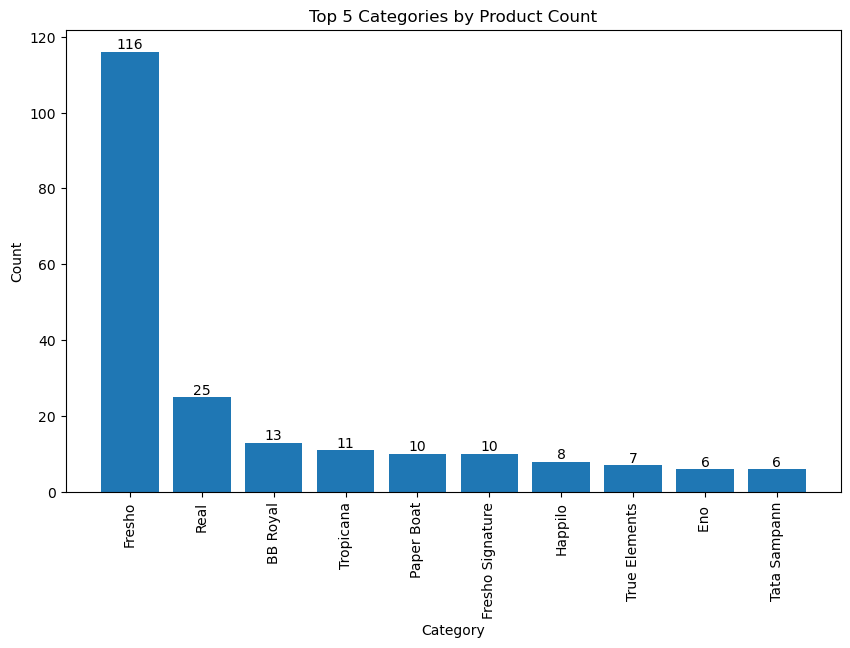

In [80]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# You can create a count of products in each category
category_counts = df['Category'].value_counts()

# Select the top 5 categories by product count
top_5_categories = category_counts.head(10)

# Create a larger figure
plt.figure(figsize=(10, 6))  # Adjust the width and height as needed

# Create a bar plot for the top 5 categories
plt.bar(top_5_categories.index, top_5_categories)

# Annotate the bars with their counts
for i, count in enumerate(top_5_categories):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Customize the plot
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 5 Categories by Product Count')
plt.xticks(rotation=90)  # Rotate category labels if needed

# Show the plot
plt.show()


In [95]:
import pandas as pd

# Load the data from "bigbasket.csv"
df = pd.read_csv("bigbasket.csv")

# Filter the data to include only rows where the percentage offer is greater than 50%
discounted_products = df[df['Percentage_offer'] >= 50]

# Display or save the relevant information
print("Products with discounts exceeding 50%:")
print(discounted_products[['Product Names', 'Category', 'Offer Price', 'Old Price', 'Quantity', 'Percentage_offer']])

# You can also save this filtered data to a new CSV file if needed:
discounted_products.to_csv("discounted_products.csv", index=False)


Products with discounts exceeding 50%:
                                         Product Names              Category  \
0                                     Banana - Robusta                Fresho   
139                                       Seeds - Flax              BB Royal   
176                   Fruit Juice - Masala Mixed Fruit                  Real   
178                   Fruit Juice - Masala Pomegranate                  Real   
186  Mini Chopper With 3 Blades - For Cutting Veget...              Wellberg   
198  Stainless Steel Rice Strainer/Colander With Ha...                 HAZEL   
212  Fruit & Vegetable Refrigerator Net Bag Set - M...                  IRIS   
225                         Fruit Juice - Masala Guava                  Real   
230  Fruit & Nut Cookies - Zero Cholesterol & No Tr...                UNIBIC   
231  Utility Fruit Loop Basket Set - Assorted Colou...                  JOYO   
257                                         Amla Candy      Fresho Signature   
2

In [33]:
print("Length of overall_name:", len(overall_name))
print("Length of overall_old_price:", len(overall_old_price))
print("Length of overall_off_price:", len(overall_off_price))
print("Length of overall_quantity:", len(overall_quantity))
print("Length of overall_category:", len(overall_category))
print("Length of overall_offer:", len(overall_offer))

Length of overall_name: 61
Length of overall_old_price: 61
Length of overall_off_price: 61
Length of overall_quantity: 61
Length of overall_category: 61
Length of overall_offer: 61


In [ ]:
finish